<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9001 entries, 0 to 9000
Data columns (total 12 columns):
DATEPRD                     9001 non-null object
NPD_WELL_BORE_CODE          9001 non-null int64
ON_STREAM_HRS               9001 non-null float64
AVG_DOWNHOLE_TEMPERATURE    9001 non-null float64
AVG_ANNULUS_PRESS           9001 non-null float64
AVG_CHOKE_SIZE_P            9001 non-null float64
AVG_WHP_P                   9001 non-null float64
AVG_WHT_P                   9001 non-null float64
DP_CHOKE_SIZE               9001 non-null float64
BORE_OIL_VOL                9001 non-null float64
BORE_GAS_VOL                9001 non-null float64
BORE_WAT_VOL                9001 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 844.0+ KB
None


FileNotFoundError: [Errno 2] No such file or directory: 'static/plot1.jpg'

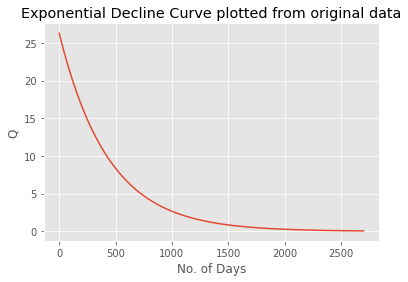

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import pickle

df = pd.read_csv('Volve production data.csv',encoding= 'unicode_escape')

#Rounding off the data to the nearest integer

newdf = np.round(df)
newdf = newdf.loc[0:9000]

#Data is highly skewed and depends on the well,hence i have used padding to fill the missing values 

newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')

newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')

newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')

newdf['AVG_DP_TUBING'] = newdf['AVG_DP_TUBING'].fillna(method='pad')

newdf['AVG_ANNULUS_PRESS'] = newdf['AVG_ANNULUS_PRESS'].fillna(method='pad')

newdf['AVG_CHOKE_SIZE_P'] = newdf['AVG_CHOKE_SIZE_P'].fillna(method='pad')

newdf['AVG_WHP_P'] = newdf['AVG_WHP_P'].fillna(method='pad')

newdf['AVG_WHT_P'] = newdf['AVG_WHT_P'].fillna(method='pad')

newdf['DP_CHOKE_SIZE'] = newdf['DP_CHOKE_SIZE'].fillna(method='pad')

newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].fillna(method='pad')

newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].fillna(method='pad')

newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].fillna(method='pad')

fill = newdf['ON_STREAM_HRS'].mean()
newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].replace(to_replace=0,value = fill )
newdf['ON_STREAM_HRS'] = round(newdf['ON_STREAM_HRS'])

newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].str.replace(',','', regex = False)
newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].str.replace(',','', regex = False)

newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].str.replace(',','', regex = False)
newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].astype(float)
newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].astype(float)
newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].astype(float)
to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE"]
newdf = newdf.drop(to_drop, axis=1)
print(newdf.info())

X = newdf.drop(['BORE_OIL_VOL','DATEPRD','NPD_WELL_BORE_CODE'],axis=1).values
y = newdf['BORE_OIL_VOL'].values

#Applying linear regression
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=42)
reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Equating Arp's Equation 
t = np.arange(0,len(y_pred))

qi = newdf['BORE_OIL_VOL'][15]/newdf['ON_STREAM_HRS'][15]
qf = newdf['BORE_OIL_VOL'][8927]/newdf['ON_STREAM_HRS'][8927]

d = (qi - qf)/(8927-15)

q = (qi) * (np.exp(-(d*t)))

plt.style.use('ggplot')
plt.plot(t, q)
plt.xlabel("No. of Days")
plt.ylabel("Q")
plt.title('Exponential Decline Curve plotted from original data')


plt.savefig('static/plot1.jpg')
plt.clf()

#Hyperbolic Decline
#b=1

q1= newdf['BORE_OIL_VOL'][15]/newdf['ON_STREAM_HRS'][15]
q2 = newdf['BORE_OIL_VOL'][26]/newdf['ON_STREAM_HRS'][26]

d = (q2 - q1)/(26-15)

q = (q1)/(1 + d*t)



plt.xlabel("No. of Days")
plt.ylabel("Q")
plt.plot(t, q, marker=".",linestyle="none")
plt.title('Harmonic Decline Curve plotted from original data')

plt.savefig('static/plot2.jpg')
plt.clf()
#Exponential decline for predicted data
#b = 0

t = np.arange(0,len(y_pred))
qi = y_pred[0]/newdf['ON_STREAM_HRS'][15]
qf = y_pred[2700]/newdf['ON_STREAM_HRS'][8927]


d = (qi - qf)/(8927 - 15)

q = qi * (np.exp(-(d*t)))


plt.plot(t, q)
plt.xlabel("No. of Days")
plt.ylabel("Q")
plt.title('Exponential Decline Curve for the predicted data')

plt.savefig('static/plot3.jpg')
plt.clf()
#Hyperbolic curve for predicted data
#b=1

t = np.arange(0,len(y_pred))

q1= y_pred[0]/newdf['ON_STREAM_HRS'][15]
q2 = y_pred[2700]/newdf['ON_STREAM_HRS'][26]

d = (q1 - q2)/(26-15)

q = (q1)/(1 + d*t)


plt.plot(t, q, marker=".",linestyle="none")
plt.xlabel("No. of Days")
plt.ylabel("Q")
plt.title('Harmonic Decline Curve for the predicted data')


plt.savefig('static/plot4.jpg')
plt.clf()

pickle.dump(reg, open('model.pkl','wb'))

